# Transformada Z

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Fast Fourier Transform

The discrete Fourier transformation (DFT) can be implemented computationally very efficiently by the [fast Fourier transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform). Various algorithms have been developed for the FFT resulting in various levels of computational efficiency for a wide range of DFT lengths. The concept of the so called [radix-2 Cooley–Tukey algorithm](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) is introduced in the following as representative.

### Transformada Z bilateral

La Transformada Z bilateral se define como

\begin{equation}
F(z) = \sum_{n = -\infty}^{\infty} f[n] \, z^{-n}
\end{equation}

donde $F(z) = \mathcal{z}\{f[n]\}$ denota la Transformada Z de $f[n]$. Una señal compleja $f[n] \in \mathbb{C}$ con índice discreto $k \in \mathbb{Z}$ está representada por su transformada $F(z) \in \mathbb{C}$ mediante la variable compleja $z \in \mathbb{C}$. Esta variable $z$ puede interpretarse como una frecuencia compleja $z = e^{\sigma + i\omega} = e^{\sigma + i 2 \pi u}$ con $\sigma, u, \omega \in \mathbb{R}$.

La existencia de la Transformada Z depende tanto de la frecuencia compleja $z$ como de la señal $f[n]$. El conjunto de los valores $z$ para los cuales la Transformada $Z$ converge se denomina región de convergencia (ROC). Las Transformadas Z de dos señales discretas distintas pueden diferir solo con respecto a sus ROC. En consecuencia, la ROC necesita ser conocida explícitamente para calcular la Transformada $Z$ inversa.

### Transformada Z unilateral

Tal como hemos visto anteriormente, las señales causales juegan un papel importante en la teoría de señales y sistemas. Para una señal causal con $f[n] = 0$ para $n <0$, se mantiene la relación $f[n] = f[n] \cdot u[n]$. Introduciendo esta función en la definición de la Transformada Z bilateral, tenemos

\begin{equation}
F(z) = \sum_{n = -\infty}^{\infty} f[n] \cdot u[n] \, z^{-n} = \sum_{n= 0}^{\infty} f[n] \, z^{-n}
\end{equation}

Esto motiva la definición de la transformación $z$ unilateral (o unilateral)

\begin{equation}
F(z) = \sum_{n = 0}^{\infty} f[n] \, z^{-n}
\end{equation}

En la literatura, ambas definiciones a veces se utilizan para definir la Transformada Z genérica. Para señales causales, ambas dan el mismo resultado. La Transformada Z unilateral también es útil para la solución de problemas de valores iniciales, por ejemplo, según lo definido por sistemas de [ecuaciones de diferencias con coeficientes constantes](./29-Sistemas_LTI_discretos.ipynb#ecuaciones_de_diferencias) donde los valores iniciales son conocidos para $n \leq 0$.

### Señales de duración finita

La Transformada Z de una señal genérica $f[n]$ de duración finita $f[n] = 0$ para $\{n : n < M_1 \wedge n \geq M_2\}$ con $M_1 < M_2$ es:

\begin{equation}
F(z) = \sum_{n=M_1}^{M_2 - 1} f[n] \, z^{-n} = f[M_1] \, z^{-M_1} + f[M_1 + 1] \, z^{- (M_1 + 1)} + \dots + f[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}

La Transformada Z de una señal genérica de longitud finita es un polinomio en $z$. Dependiendo de los límites particulares de $M_1$ y $M_2$, el polinomio puede contener potencias de $z$ y $z^{-1}$. Para una señal causal de longitud finita, el resultado anterior degenera en el caso $M_1 = 0$ y $M_2 > 0$:

\begin{equation}
F(z) = f[0] + f[1] \, z^{-1} + \dots + f[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}

La Transformada Z de una señal causal de longitud finita es un polinomio en $z^{-1}$. La ROC para este es $z \in \mathbb{C} \setminus \{ 0 \}$. De forma análoga, se puede calcular la Transformada Z y ROC de una señal anticausal. Las ROC para una señal genérica de longitud finita se pueden resumir de la siguiente manera:

* $z \in \mathbb{C}$ para una señal anticausal ($M_1 < 0$, $M_2 \leq 0$)* $z \in \mathbb{C}_\infty$ si $f[n] = 0$ para $n \neq 0$ ($M_1 = 0$, $M_2 = 1$)
* $z \in \mathbb{C} \setminus \{0\}$ para una señal causal ($M_1 = 0$, $M_2 > 0$)

donde $\mathbb{C}_\infty = \mathbb{C} \cup \{\infty\}$ denota el [conjunto de números complejos extendidos](https://en.wikipedia.org/wiki/Riemann_sphere).

***
### Ejemplo: Transformada Z de un rect

La señal rectangular $f[n] = \sqcap_N[n]$ es una señal causal de duración finita. Por lo tanto, su Transformada Z puede derivarse directamente como

\begin{equation}
\mathcal{Z} \{ \sqcap_N[k] \} = \sum_{k=0}^{N-1} z^{-k} = 1 + z^{-1} + \dots + z^{-N + 1}
\end{equation}

para $z \in \mathbb{C} \setminus \{0\}$. La suma anterior también se puede interpretar como una [serie geométrica finita](https://en.wikipedia.org/wiki/Geometric_series) con factor común $\frac{1}{z}$, lo que permite escribir de forma alternativa la Transformada Z de un rect

\begin{equation}
\mathcal{Z} \{ \sqcap_N[k] \} =  \begin{cases}
\frac{1 - z^{-N}}{1 - z^{-1}} & \text{para } z \neq 1 \\
N & \text{para } z = 1
\end{cases}
\end{equation}

***
### Ejemplo: Transformada Z de un impulso unitario discreto

La Transformada $\mathcal{Z}\{\delta[n]\}$ del [impulso de Dirac](./26-Funciones_importantes_discretas.ipynb#impulso) se obtiene al introducir $\delta[n]$ en la definición de la Transformada Z bilateral y usando la propiedad del cedazo del impulso:

\begin{equation}
\mathcal{Z}\{\delta[n]\} = \sum_{n = -\infty}^{\infty} \delta[n] \, z^{-n} = 1
\end{equation}

para $z \in \mathbb{C}$. La ROC cubre todo el plano complejo.

La Transformada Z del impulso es igual a uno. Por lo tanto, todas las frecuencias complejas $z$ están presentes con igual importancia. Dado que el impulso de Dirac se usa para caracterizar sistemas lineales invariantes en el tiempo (LTI) por su [respuesta al impulso](./29-Sistemas_LTI_discretos.ipynb#respuesta_al_impulso) $h[n] = \mathcal{H}\{ \delta[n]\}$, este resultado constituye una propiedad importante en la teoría de señales y sistemas discretos.

**Código**

La Transformada Z del impulso de Dirac se calcula mediante la evaluación directa de su definición. El impulso de Dirac está representado por el [delta de Kronecker](https://en.wikipedia.org/wiki/Kronecker_delta) $\delta[n] = \delta_{n 0}$ en `SymPy`.

In [10]:
import sympy as sym
sym.init_printing()
%matplotlib inline

n = sym.symbols('n', integer=True)
z = sym.symbols('z', complex=True)

F = sym.summation(sym.KroneckerDelta(n, 0) * z**(-n), (n, -sym.oo, sym.oo))
F

***
### Ejemplo: Transformada Z de una señal exponencial compleja causal

Sea $f[n]$ una señal exponencial causal,

\begin{equation}
f[n] = z_0^n \cdot u[n]
\end{equation}

con frecuencia compleja $z_0 \in \mathbb{C}$. Su Transformada Z unilateral está dada por:


\begin{equation}
F(z) = \sum_{k=0}^{\infty} z_0^n \cdot z^{-n} = \sum_{n=0}^{\infty} \left( \frac{z_0}{z} \right)^n = \frac{z}{z - z_0}
\end{equation}

Este resultado se deriva al observar que esta suma es una [serie geométrica infinita](https://en.wikipedia.org/wiki/Geometric_series) con factor común $\frac{z_0}{z}$, la cual converge para $\left| \frac{z_0}{z} \right| < 1$. La ROC es entonces:

\begin{equation}
|z| > |z_0|
\end{equation}

Combinando los resultados anteriores, obtenemos finalmente?

\begin{equation}
\mathcal{Z} \{ z_0^n \cdot u[n] \} = \frac{z}{z - z_0} \qquad \text{para } |z| > |z_0|
\end{equation}

**Código**

En este código utilizaremos la definición de la Transformada Z para calcular la transformada de la señal exponencial compleja causal $f[n] = z_0^n \cdot u[n]$ con $z_0 \in \mathbb{C}$.

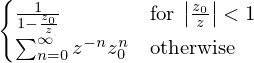

In [9]:
import sympy as sym
sym.init_printing()
%matplotlib inline

n = sym.symbols('n', integer=True)
z = sym.symbols('z', complex=True)
z0 = sym.symbols('z0')

F = sym.summation(z0**n * z**(-n), (n, 0, sym.oo))
F

***
## ROC y convergencia

La Transformada Z se define mediante una serie infinita. Una condición suficiente pero no necesaria para la convergencia de una serie infinita es que sus elementos sean absolutamente sumables. Aplicando esto a la definición de la Transformada Z bilateral $F(z) = \mathcal{Z}\{[n]\}$ de una secuencia $f[n]$ tenemos:

\begin{equation}
\sum_{n = -\infty}^{\infty} | f[n] \cdot z^{-n} | = \sum_{n = -\infty}^{\infty} | f[n] | \cdot | z |^{-n}  < \infty
\end{equation}

Vemos que la ROC está determinada únicamente por la magnitud $|z|$ de la frecuencia compleja. Por lo tanto, la ROC está dada por un anillo en el plano-$z$ que puede incluir el origen $z=0$ y/o el infinito $z=\infty$. La fase $\omega$ de la frecuencia compleja $z$ no tiene efecto alguno en término de la convergencia, ya que $z = e^{\sigma} \cdot e^{i \omega}$.

Para una señal derecha de largo infinito $f[n] = 0$ para $n < M$, la ROC consiste en el lugar geométrico tal que $|z| > a$ con $a \in \mathbb{R}^+$. Esto es debido al decaimineot de los términos  $|z|^{-n}$ para $n \to \infty$, lo que asegura la convergencia para un $a$ dado. Sin embargo, esto solo se cumple para señales con [crecimiento exponencial](https://en.wikipedia.org/wiki/Exponential_growth). 

El mismo razonamiento puede aplicarse para señales izquierdas y bilaterales. Las ROC resultantes se pueden ver en la siguiente figura, donde el área en amarillo indica la región de convergencia, es decir las regiones del plano-$z$ donde $F(z)$ converge.

![Regiones de convergencia Transformada Z](images/ROC-TransformadaZ.png)

Las áreas grises denotan los valores $z$ para los cuales la Transformada Z converge. Los bordes $a$ de estas áreas, en lineas punteadas, dependen de la señal $f[n]$. En este caso, la Transformada $F(z)$ está dada en términos de una función racional de $z$, y la ROC debe escogerse de tal manera de no incluir ceros en el denominador del polonomio.

## Polos y ceros

La Transformada Z $F(z) = \mathcal{Z}\{f[n]\}$ depende de la frecuencia compleja $z \in \mathbb{C}$ y, en general, tiene un valor complejo, es decir $F(z) \in \mathbb{C}$. Una forma de graficar $F(z)$ es mediante su magnitud $|F(z)|$ y fase $\varphi(z)$ o partes real $\Re \{F(z)\}$ e imaginaria $\Im \{F(z)\}$ en el plano-$z$. 

Sin embargo, muchas Transformadas Z de interés en la teoría de señales y sistemas son [funciones racionales](https://en.wikipedia.org/wiki/Rational_function) en $z$. Los polinomios del numerador y el denominador pueden representarse por sus [raíces complejas](https://en.wikipedia.org/wiki/Zero_of_a_function#Polynomial_roots) y un factor constante. Las raíces del numerador se denominan *ceros* mientras que las raíces del denominador se denominan *polos* de $F(z)$. El polinomio y la representación en polos y ceros de una transformación matemática racional son equivalentes

\begin{equation}
F(z) = \frac{\sum_{m=0}^{M} \beta_m \, z^{-m}}{\sum_{n=0}^{N} \alpha_n \, z^{-n}} = K \cdot \frac{\prod_{\mu=0}^{Q} (z - z_{0 \mu})}{\prod_{\nu=0}^{P} (z - z_{\infty \nu})}
\end{equation}

donde $M$ y $N$ denotan el orden del numerador y denominador respectivamente, $z_{0\mu}$ y $z_{\infty \nu}$ el $\mu$-ésimo cero y $\nu$-ésimo polo de $F(z)$, y $Q = M-1$ y $P = N-1$ el número total de ceros y polos, respectivamente. Para $M=N$, el factor $K = \frac{\beta_M}{\alpha_N}$. Si

* $M > N$ al menos un polo está ubicado en $|z| = \infty$,
* $M < N$ al menos un polo está ubicado en $z = 0$.

Es común ilustrar los polos y ceros en un [diagrama de polos y ceros](https://en.wikipedia.org/wiki/Pole%E2%80%93zero_plot). Aquí las ubicaciones de los polos y ceros complejos, sus grados y el factor $K$ se grafican en el plano $z$. Es común incluir el círculo unitario $|z| = 1$ en la gráfica debido a su relevancia en la teoría de señales y sistemas discretos. A continuación se muestra un ejemplo de un diagrama de polos y ceros.

<img src="images/PolosCerosZ.png" width="600" alt="Ejemplo de diagrama de polo cero"/>

Las ubicaciones de los polos y ceros proporcionan información sobre la composición de una señal. Por ejemplo, la Transformada Z de la señal exponencial compleja tiene un cero en $z=0$ y un polo en $z = z_0$. Una señal que se compone de una superposición de señales exponenciales complejas tendrá múltiples polos cuyas posiciones están relacionadas con las frecuencias complejas de las señales de las que está compuesta.

**Ejemplo**

La magnitud de la transformada Z de la señal exponencial compleja causal

\begin{equation}
F(z) = \frac{z}{z - z_0} \qquad \text{para } |z| > |z_0|
\end{equation}

del ejemplo anterior se grafica en el plano $z$ para el caso $z_0 = 1 + i$

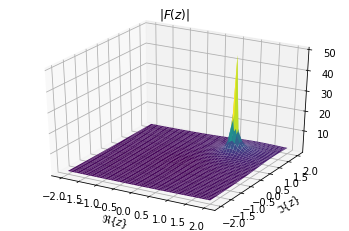

In [11]:
import sympy as sym
sym.init_printing()
%matplotlib inline

k = sym.symbols('k', integer=True)
z = sym.symbols('z', complex=True)
z0 = sym.symbols('z0')

rez, imz = sym.symbols('rez imz', real=True)

F = z / (z - z0)
F1 = F.subs({z: rez+sym.I*imz, z0: 1+sym.I})

sym.plotting.plot3d(abs(F1), (rez, -2, 2), (imz, -2, 2),
                    xlabel=r'$\Re\{z\}$', ylabel=r'$\Im\{z\}$', title=r'$|F(z)|$');

De forma alternativa, podemos calcular los polos de $F(z)$:

In [3]:
poles = sym.roots(sym.denom(F), z)
poles

y también los ceros:

In [4]:
zeros = sym.roots(sym.numer(F), z)
zeros

Mediante este cálculo podemos graficar $F(z)$ mediante su diagrama de polos y ceros:

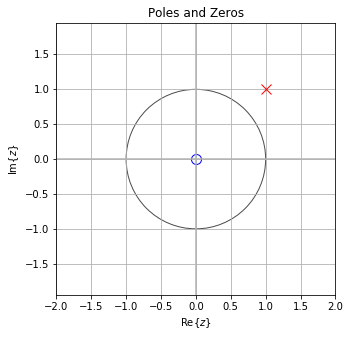

In [13]:
from pole_zero_plot import pole_zero_plot

F2 = F.subs(z0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(F2), z), sym.roots(sym.numer(F2), z))

***
## Relación con la Transformada de Laplace

Supongamos una señal $f(t)$ que es muestreada con un período de muestreo $T$:

\begin{equation}
f_\text{s}(t) = f {\bot \!\! \bot \!\! \bot}_T = \sum_{n = -\infty}^{\infty} f(nT) \cdot \delta_{nT} = \sum_{n = -\infty}^{\infty} f[n] \cdot \delta_{nT}
\end{equation}

Al tomar la Transformada de Laplace de esta señal, utilizando la [extensión de la Transformada de Laplace a distribuciones](./19-Transformada_de_Laplace.ipynb#distribuciones), podemos calcular la Transformada de Laplace de Tiempo Discreto (DTLT) tenemos 

\begin{equation}
\text{DTLT}{f}\{s\} = F_\text{s}(s) = \langle \sum_{n = -\infty}^{\infty} f[n] \cdot \delta_{nT}, e^{- st}
\rangle = \sum_{n = -\infty}^{\infty} f[n] \, e^{-snT}
\end{equation}

donde la igualdad anterior se logra intercambiando las operaciones de suma e integración y utilizando la [propiedad del cedazo del impulso](07-Impulso.ipynb#cedazo). Al comparar con la definición de la Transformada Z, tenemos:

\begin{equation}
F_\text{s}(s) = F(z) \big\rvert_{z = e^{sT}}
\end{equation}

Podemos concluir que la Transformada Discreta de Laplace (DTLT) $F_\text{s}(s)$ es igual a la Transformada Z de la señal discreta $F(z)$ para $z = e^{sT}$. Esto implica que el plano-$s$ es mapeado hacia el plano-$z$ de acuerdo a la siguiente figura.


![Mapeo del plano-$s$ al plano-$z$](images/Equivalencias-s-z.png)

La Transformada de Laplace de una señal muestreada es periódica con respecto a la frecuencia $u = \omega/2\pi$. Por lo tanto, es suficiente considerar el área $-\frac{1}{2T} < u =\operatorname{\mathbb{I}m}\{s\} < \frac{1}{2T}$ del plano-$s$ para el mapeo. El semiplano izquierdo del plano-$s$ se mapea al interior del círculo unitario. El semiplano derecho se mapea al exterior del círculo unitario. El eje imaginario del plano-$s$ se mapea hacia el círculo unitario $|z|=1$. Líneas verticales en el plano-$s$ se convierten en circunferencias en el plano-$z$ y líneas horizontales se mapean hacia líneas diagonales. La frecuencia $s=0$ se convierte en $z=1$ y las frecuencias $s=\pm i \frac{1}{2T}$ son mapeadas hacia $z=-1$.

***
## Relación con la Transformada de Fourier

La Transformada Z utiliza el número complejo $z$, que se puede escribir en forma polar de la forma, es decir $z = r  e^{+i 2\pi u T}$, donde $r = e^{\sigma T}$. Escribiendo explícitamente este término en la definición de la Transformada Z:

$$ F(z) = \sum_{n=-\infty}^{\infty} f[n] z^{-n} $$

$$ F(r  e^{i 2\pi u T}) =  \sum_{n=-\infty}^{\infty}  f[n] r^{-n} e^{-i 2\pi u n T} $$

Recordando la definición de la Transformada de Fourier de tiempo discreto (DTFT):

$$ \tilde{F}(u) = \sum_{n = -\infty}^{\infty} f[n] \, e^{-i 2 \pi u n T} $$

Es fácil ver que la Transformada Z no es otra cosa que la DTFT de la secuencia $r^{-n}f[n]$, es decir

$$ \mathcal{Z}\{f\}(re^{i2\pi uT}) = \text{DTFT}\{r^{-n}f[n]\} $$

En el caso en que $\sigma = 0$, o bien $r=1$, la definición de la Transformada Z se reduce a:

$$ F(z)\biggr\rvert_{z = e^{i 2\pi u T}} = \sum_{n=-\infty}^{\infty} f[n] e^{- i 2 \pi u n T} = \text{DTFT}\{f[n]\}(u) $$

Desde este punto de vista, la Transformada Z es un caso más general de la DTFT, donde la secuencia $f[n]$ se fuerza a decaer mediante la multiplicación por el término $r^{-n}$, al igual como sucede con la Transformada de Laplace y la Transformada de Fourier continua.

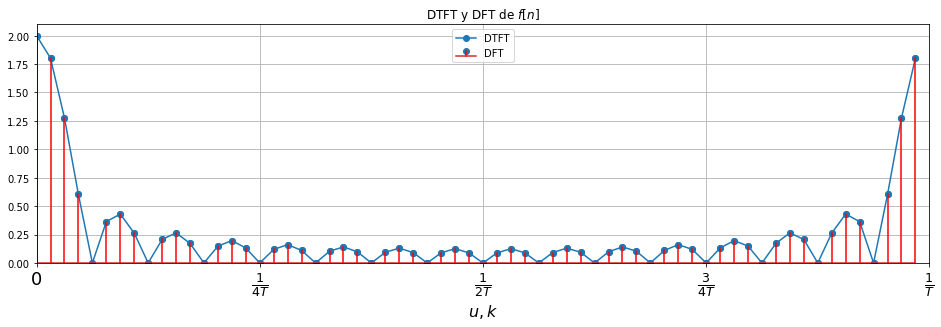

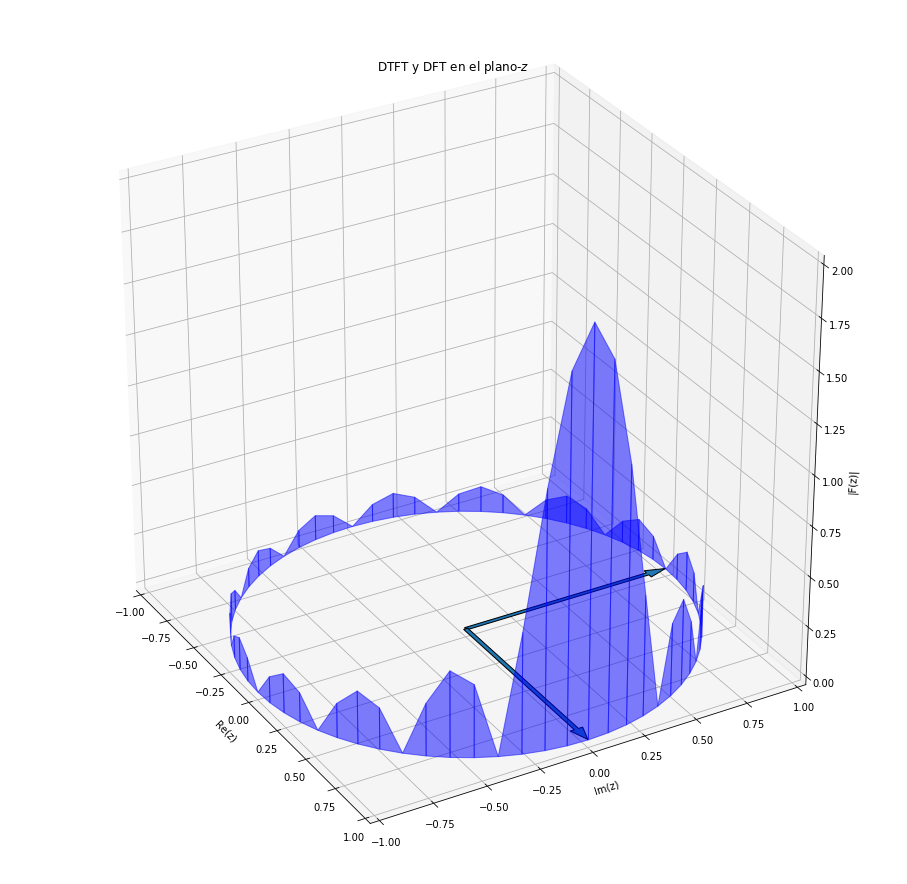

In [15]:
from __future__ import  division
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix
    return U/np.sqrt(Nfft)


U = dftmatrix(64,16)
x = np.ones((16,1))
X = U.H*x

a=2*np.pi/64.*np.arange(64)
d=np.vstack([np.cos(a),np.sin(a),np.array(abs(X)).flatten()]).T

f,ax=plt.subplots()
f.set_size_inches((16,8))
ax.set_aspect(0.8)
ax.grid()
ax.plot(np.arange(0,64)*2*np.pi/64.,abs(X),'o-',label='DTFT')
ax.stem(np.arange(0,64)*2*np.pi/64.,abs(X),'r',label='DFT')
ax.set_xticks([0, np.pi/2., np.pi, 3*np.pi/2,2*np.pi])
ax.set_xlabel(r'$u, k$',fontsize=16)
ax.axis([0, 2*np.pi,0,2.1])
ax.set_xticklabels(['0',r'$\frac{1}{4T}$', r'$\frac{1}{2T}$',r'$\frac{3}{4T}$', r'$\frac{1}{T}$'],fontsize=18);
ax.set_title('DTFT y DFT de $f[n]$')
ax.legend()

fig = plt.figure()
fig.set_size_inches(16,16)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.axis([-1,1,-1,1])
ax.set_zlim([0,d[:,2].max()])
#ax.set_aspect(1)
ax.view_init(azim=-30)

ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('|F(z)|')
ax.set_title('DTFT y DFT en el plano-$z$')

def facet_filled(x,alpha=0.5,color='b'):
    'construct 3D facet from adjacent points filled to zero'
    a,b=x
    a0= a*np.array([1,1,0])
    b0= b*np.array([1,1,0])
    ve = np.vstack([a,a0,b0,b])      # create closed polygon facet
    poly = Poly3DCollection([ve]) # create facet
    poly.set_alpha(alpha)
    poly.set_color(color)
    return poly

sl=[slice(i,i+2) for i in range(d.shape[0]-2)] # collect neighboring points
for s in sl:
  poly=facet_filled(d[s,:])
  ax.add_collection3d(poly)
 
# edge polygons    
ax.add_collection3d(facet_filled(d[[-1,0],:]))
ax.add_collection3d(facet_filled(d[[-2,-1],:]))

# add 0 and pi/2 arrows for reference
a=FancyArrow(0,0,1,0,width=0.02,length_includes_head=True)
ax.add_patch(a)
b=FancyArrow(0,0,0,1,width=0.02,length_includes_head=True)
ax.add_patch(b)
art3d.patch_2d_to_3d(a)
art3d.patch_2d_to_3d(b)

plt.show()






<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>